# Import Modules

In [1]:
# data and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Prep Data

In [2]:
# import dataframes
filepath = '../data/data-case.xlsx'
df_users = pd.read_excel(filepath, sheet_name='users')
df_nps = pd.read_excel(filepath, sheet_name='nps')
df_appts = pd.read_excel(filepath, sheet_name='appointments')

# visualize datafram3es
df_users.head()

,user_id,gender,birth_date,start_date,end_date,city_code
0,1,female,1981-07-07,2010-06-29,2010-11-02,3
1,2,male,1996-10-08,2011-01-18,2012-02-18,1
2,3,female,1986-06-03,2010-01-13,2010-09-12,3
3,4,male,1992-07-28,2010-11-19,2012-08-01,3
4,5,male,1981-04-21,2011-08-27,2011-12-11,2


In [3]:
df_nps.head()

,user_id,nps
0,1,9
1,2,5
2,3,5
3,4,10
4,5,8


In [4]:
df_appts.head()

,appt_id,user_id,appointment_date,channel,type
0,1,1,2010-08-10,chat,first
1,2,1,2010-10-29,chat,regular
2,3,2,2011-06-18,presential,first
3,4,2,2011-10-24,chat,regular
4,5,2,2011-12-29,chat,regular


In [5]:
# compute number of days as a client, end date inclusive
df_users['num_days'] = df_users['end_date'] - df_users['start_date']
df_users['num_days'] = df_users['num_days'].dt.days
df_users.head()

,user_id,gender,birth_date,start_date,end_date,city_code,num_days
0,1,female,1981-07-07,2010-06-29,2010-11-02,3,126
1,2,male,1996-10-08,2011-01-18,2012-02-18,1,396
2,3,female,1986-06-03,2010-01-13,2010-09-12,3,242
3,4,male,1992-07-28,2010-11-19,2012-08-01,3,621
4,5,male,1981-04-21,2011-08-27,2011-12-11,2,106


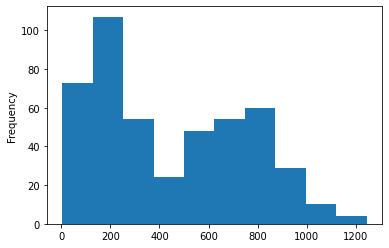

In [6]:
# Visualize distribution of days spent in the platform
plt.figure();
ax = df_users['num_days'].plot.hist()

# Linear Regression

In [7]:
df_reg = df_nps.copy()
df_reg['gender'] = df_users['gender']
df_reg['city_code'] = df_users['city_code']
df_reg['num_days'] = df_users['num_days']

X = df_reg
X.head()

,user_id,nps,gender,city_code,num_days
0,1,9,female,3,126
1,2,5,male,1,396
2,3,5,female,3,242
3,4,10,male,3,621
4,5,8,male,2,106


In [8]:
from statsmodels.formula.api import ols

model = ols('num_days ~ nps + C(gender) + C(city_code)', data=X)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_days   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6430
Date:                Tue, 07 Apr 2020   Prob (F-statistic):              0.742
Time:                        00:29:15   Log-Likelihood:                -3299.7
No. Observations:                 463   AIC:                             6617.
Df Residuals:                     454   BIC:                             6655.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           490.6872    218.907      2.242      0.025      60.490     920.885
C(gender)[T.male]    34.2590     29.379      1.166      0.244     -23.477      91.995
C(city_code)[T.1]   -31.5340    224.290     -0.141      0.888    -472.309     409.241
C(city_code)[T.2]   -86.2432    217.133     -0.397      0.691    -512.953     340.467
C(city_code)[T.3]   -90.3135    216.304     -0.418      0.676    -515.395     334.768
C(city_code)[T.4]   -69.8544    216.926     -0.322      0.748    -496.158     356.449
C(city_code)[T.5]  -166.6843    224.956     -0.741      0.459    -608.768     275.400
C(city_code)[T.6]  -213.3122    278.198     -0.767      0.444    -760.028     333.404
nps                   3.3119      5.458      0.607      0.544      -7.414      14.038
==============================================================================
Omnibus:                      187.994   Durbin-Watson:                   3.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.427
Skew:                           0.341   Prob(JB):                     5.51e-08
Kurtosis:                       1.874   Cond. No.                         288.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
model = ols('num_days ~ nps + C(gender)', data=X)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_days   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9100
Date:                Tue, 07 Apr 2020   Prob (F-statistic):              0.403
Time:                        00:29:15   Log-Likelihood:                -3301.4
No. Observations:                 463   AIC:                             6609.
Df Residuals:                     460   BIC:                             6621.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           403.1030     41.497      9.714      0.000     321.555     484.651
C(gender)[T.male]    33.2468     29.247      1.137      0.256     -24.227      90.720
nps                   3.7812      5.360      0.705      0.481      -6.751      14.314
==============================================================================
Omnibus:                      244.525   Durbin-Watson:                   3.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.233
Skew:                           0.337   Prob(JB):                     2.23e-08
Kurtosis:                       1.829   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Include num appts

In [10]:
df = df_appts.copy()
df = df.groupby('user_id', as_index=False).count()
df = df.drop(columns=['appt_id', 'appointment_date', 'channel'])
df = df.rename(columns={"type": "num_appts"})
df_reg['num_appts'] = df['num_appts']

X = df_reg
X.head()

,user_id,nps,gender,city_code,num_days,num_appts
0,1,9,female,3,126,2
1,2,5,male,1,396,7
2,3,5,female,3,242,4
3,4,10,male,3,621,8
4,5,8,male,2,106,1


In [11]:
model = ols('num_appts ~ nps + C(gender) + C(city_code)', data=X)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_appts   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6458
Date:                Tue, 07 Apr 2020   Prob (F-statistic):              0.739
Time:                        00:29:15   Log-Likelihood:                -1295.4
No. Observations:                 463   AIC:                             2609.
Df Residuals:                     454   BIC:                             2646.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.5859      2.886      2.282      0.023       0.915      12.257
C(gender)[T.male]     0.4549      0.387      1.175      0.241      -0.306       1.216
C(city_code)[T.1]    -0.5452      2.957     -0.184      0.854      -6.356       5.265
C(city_code)[T.2]    -1.2832      2.862     -0.448      0.654      -6.908       4.342
C(city_code)[T.3]    -1.3104      2.851     -0.460      0.646      -6.914       4.293
C(city_code)[T.4]    -0.9856      2.860     -0.345      0.731      -6.605       4.634
C(city_code)[T.5]    -2.4178      2.966     -0.815      0.415      -8.246       3.410
C(city_code)[T.6]    -2.4891      3.667     -0.679      0.498      -9.696       4.718
nps                   0.0267      0.072      0.371      0.711      -0.115       0.168
==============================================================================
Omnibus:                       89.330   Durbin-Watson:                   3.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.386
Skew:                           0.364   Prob(JB):                     6.86e-07
Kurtosis:                       2.029   Cond. No.                         288.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model = ols('num_appts ~ nps + C(gender)', data=X)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              num_appts   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7833
Date:                Tue, 07 Apr 2020   Prob (F-statistic):              0.458
Time:                        00:29:15   Log-Likelihood:                -1297.3
No. Observations:                 463   AIC:                             2601.
Df Residuals:                     460   BIC:                             2613.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.3051      0.547      9.695      0.000       4.230       6.380
C(gender)[T.male]     0.4398      0.386      1.140      0.255      -0.318       1.198
nps                   0.0350      0.071      0.495      0.621      -0.104       0.174
==============================================================================
Omnibus:                      112.835   Durbin-Watson:                   3.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.986
Skew:                           0.356   Prob(JB):                     3.08e-07
Kurtosis:                       1.976   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model = ols('num_days ~ num_appts', data=X)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_days   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     8551.
Date:                Tue, 07 Apr 2020   Prob (F-statistic):          9.57e-300
Time:                        00:29:15   Log-Likelihood:                -2614.1
No. Observations:                 463   AIC:                             5232.
Df Residuals:                     461   BIC:                             5240.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3373      5.633      3.433      0.001       8.267      30.407
num_appts     73.8888      0.799     92.470      0.000      72.319      75.459
==============================================================================
Omnibus:                       60.231   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.395
Skew:                           0.708   Prob(JB):                     4.84e-29
Kurtosis:                       5.181   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

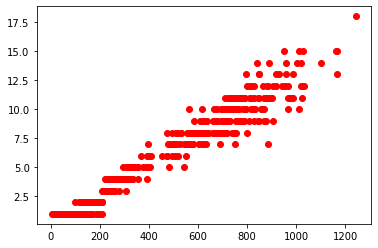

In [14]:
ax = plt.plot(X['num_days'], X['num_appts'], 'ro')

# K Means

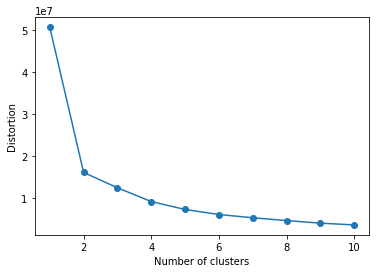

In [15]:
df_k = df_nps.copy() # df_users has categorical data
df_k['num_days'] = df_users['num_days']

X = df_k

from sklearn.cluster import KMeans

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [16]:
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

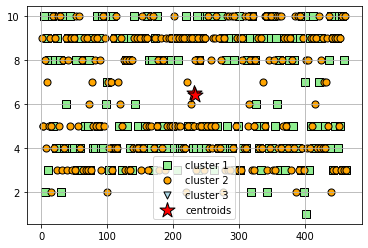

In [17]:
X = np.array(X) #that all

# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()